In [137]:
# import libraries
import pandas as pd

In [138]:
#read csv file
criminal_data = pd.read_csv('Data_Criminal_GRAY_LIST.csv')
criminal_data.head()

,JLR_LINK,TRANS_TYPE_OF_CASE,TRANS_LEGAL_RELATIONSHIP,PDF_TEXT,EXTRACT,ID,NAME,Year,Month,Day,GENDER,BIRTH
0,https://congbobanan.toaan.gov.vn/2ta1059816t1c...,刑事,犯罪違反採伐、保護森林和管理林木的規定,<Page:1>TÒA ÁN NHÂN DÂN CỘNG HÒA XÃ HỘI CHỦ NG...,"1/ Trần Văn T, sinh ngày 01 tháng 01 năm 1987...",No_Id,Trần Văn T,1987,1,1,Male,1987-01-01 00:00:00
1,https://congbobanan.toaan.gov.vn/2ta1067905t1c...,刑事,殺人罪,<Page:1>TÒA ÁN NHÂN DÂN CỘNG HÒA XÃ HỘI CHỦ NG...,"Lê Văn T, sinh ngày 01/01/1984; tại thành phố...",No_Id,Lê Văn T,1984,1,1,Male,1984-01-01 00:00:00
2,https://congbobanan.toaan.gov.vn/2ta999646t1cv...,刑事,故意對他人造成傷害或損害健康的罪行,<Page:1>TÒA ÁN NHÂN DÂN CỘNG HÒA XÃ HỘI CHỦ NG...,"1. Họ và tên: Nguyễn Thị Mỹ N, sinh ngày 26/6...",No_Id,Nguyễn Thị Mỹ N,2003,6,26,Female,2003-06-26 00:00:00
3,https://congbobanan.toaan.gov.vn/2ta434382t1cv...,刑事,犯罪賭博,<Page:1>TÒA ÁN NHÂN DÂN CỘNG HÒA XÃ HỘI CHỦ NG...,"Nguyễn Văn L- sinh ngày 10/02/1964 tại xã Đ, ...",No_Id,Nguyễn Văn L,1964,2,10,Male,1964-02-10 00:00:00
4,https://congbobanan.toaan.gov.vn/2ta1130813t1c...,刑事,犯罪擾亂公共秩序,<Page:1>TOÀ ÁN NHÂN DÂN CỘNG HOÀ XÃ HỘI CHỦ NG...,"Nguyễn Hữu Hoàng Duy, sinh ngày 12 tháng 09 n...",No_Id,Nguyễn Hữu Hoàng Duy,2004,9,12,Male,2004-09-12 00:00:00


In [139]:
criminal_data.columns

Index(['JLR_LINK', 'TRANS_TYPE_OF_CASE', 'TRANS_LEGAL_RELATIONSHIP',
       'PDF_TEXT', 'EXTRACT', 'ID', 'NAME', 'Year', 'Month', 'Day', 'GENDER',
       'BIRTH'],
      dtype='object')

In [141]:
from underthesea import ner
extracted = criminal_data['EXTRACT']

In [162]:
#3. using ner
ner_res = ner(extracted[0])
for n in ner_res:
    print(n[0], n[3])

1 O
/ O
Trần Văn T B-LOC
, O
sinh O
ngày O
01 O
tháng O
01 O
năm B-LOC
1987 I-LOC
tại O
Quảng Nam B-LOC
; O
Nơi O
cư trú O
: O
thôn O
04 O
, O
xã B-LOC
TG I-LOC
, O
huyện B-LOC
Bắc Trà My I-LOC
, O
tỉnh O
Quảng Nam B-LOC
; O
nghề nghiệp O
: O
nông O
; O
trình độ O
văn hóa O
: O
03/12 O
; O
dân tộc O
: O
Cadong B-PER
; O
giới tính O
: O
nam O
; O
tôn giáo O
: O
không O
; O
quốc tịch O
: O
Việt Nam B-LOC
; O
con O
ông O
Trần Văn Tiếu B-PER
và O
bà O
Thanh Thị Liên B-PER
; O
vợ O
tên B-LOC
Phạm Thị Hiếm I-LOC
và O
02 O
con O
; O
tiền án O
, O
tiền sự O
: O
không O
; O
Bị cáo O
bị O
áp dụng O
biện pháp O
ngăn chặn O
: O
“ O
Cấm B-PER
đi O
khỏi O
nơi O
cư trú O
” O
, O
có mặt O
tại O
phiên O
tòa O
. O
2 O
/ O
Đinh Tấn M B-LOC
, O
sinh O
ngày O
21 O
tháng O
6 O
năm B-LOC
1995 I-LOC
tại O
Quảng Nam B-LOC
; O
Nơi O
cư trú O
: O
thôn O
04 O
, O
xã B-LOC
TG I-LOC
, O
huyện B-LOC
Bắc Trà My I-LOC
, O
tỉnh O
Quảng Nam B-LOC
; O
nghề nghiệp O
: O
nông O
; O
trình độ O
văn hóa O
: O
10/12 O
; O
dân 

In [143]:
print(len(ner_res))

492


In [144]:
pos_tag_set = set()
chunk_set = set()
ner_set = set()
count = 0
for i in range(len(ner_res)):
    pos_tag_set.add(ner_res[i][1])
    chunk_set.add(ner_res[i][2])
    ner_set.add(ner_res[i][3])
print(ner_set)

{'I-LOC', 'O', 'B-PER', 'B-LOC'}


In [153]:
# Find out the 'name', 'birthday_keyword' and date from the text
def find_elements(token_sentence):
    names, birthday_keywords, dates = [], [], []
    for i in range(len(token_sentence)):
        #find birthday_keywords
        if 'Sinh' in token_sentence[i][0] or 'sinh' in token_sentence[i][0]:
            birthday_keywords.append((i, token_sentence[i][0]))

        #find names
        # name are Np (Proper Noun) and must more that one words
        elif token_sentence[i][1] == 'Np' and len(token_sentence[i][0].split(' ')) > 1:
            name = token_sentence[i][0]
            names.append((i, name))

        #find dates
        #case 1 : dd/mm/yyyy are separated by other words
        elif i < len(token_sentence) - 5 and token_sentence[i][1] == 'M' and token_sentence[i+2][1] == 'M' and token_sentence[i+4][1] == 'M':
            date = token_sentence[i][0] + "/" + token_sentence[i+2][0] + "/" + token_sentence[i+4][0]
            dates.append((i, date))
        #case 2 : 'dd/mm/yyyy' is a whole word, categorized as 'M' or 'N'
        elif (token_sentence[i][1] == 'M' or token_sentence[i][1] == 'N') and token_sentence[i][0].count('/') == 2:
            date = token_sentence[i][0]
            if ' ' in date:
                date = date.split(' ')
                date = date[0]
            dates.append((i, date))
    
    return names, birthday_keywords, dates
        

In [166]:
# find the group of data that are related
# every element in the list can only be use once
def combination(names_list, sinh_list, dates_list):
    result = []
    # Determine the minimun number of elements in the list
    min_len = min(len(dates_list), len(sinh_list), len(names_list))
    date_start, name_start = 0, 0
    for m in range(min_len):
        closest_name = None
        closest_date = None
        min_diff_name = float('inf')
        min_diff_date = float('inf')
        skip = False
        sinh = sinh_list[m]
        # determine if the sinh is usable
        for i in range(m, len(sinh_list)):
            if abs(sinh_list[i][0] - dates_list[date_start][0]) < abs(sinh[0] - dates_list[date_start][0]):
                skip = True
                break
        if not skip:
            for j in range(date_start, len(dates_list)):
                date = dates_list[j]
                if abs(date[0] - sinh[0]) < min_diff_date:
                    min_diff_date = abs(date[0] - sinh[0])
                    closest_date = date
            
            for k in range(name_start, len(names_list)):
                name = names_list[k]
                if abs(name[0] - sinh[0]) < min_diff_name and name[0] != sinh[0]:
                    min_diff_name = abs(name[0] - sinh[0])
                    closest_name = name
            
            result.append((closest_name, sinh, closest_date))
            return result
            date_start, name_start = dates_list.index(closest_date) + 1, names_list.index(closest_name) + 1
            
    return result

In [173]:
for i in range(100):
    sent = ner(extracted[i], format='text')
    print(i)
    names, birthday_keywords, dates = find_elements(sent)
    try:
        print(criminal_data['NAME'][i], combination(names, birthday_keywords, dates)[0])
    except:
        continue
    

0
Trần Văn T ((2, 'Trần Văn T'), (4, 'sinh'), (6, '01/01/1987'))
1
Lê Văn T ((0, 'Lê Văn T'), (2, 'sinh'), (4, '01/01/1984'))
2
Nguyễn Thị Mỹ N ((6, 'Nguyễn Thị Mỹ N'), (8, 'sinh'), (10, '26/6/2003'))
3
Nguyễn Văn L ((0, 'Nguyễn Văn L'), (2, 'sinh'), (4, '10/02/1964'))
4
Nguyễn Hữu Hoàng Duy ((0, 'Nguyễn Hữu Hoàng Duy'), (2, 'sinh'), (4, '12/09/2004'))
5
Linh Văn G ((2, 'Lăng Văn P'), (10, 'sinh'), (12, '15/8/1997'))
6
7
Nguyễn Văn C ((4, 'Nguyễn Văn C'), (8, 'Nam Sinh'), (11, '25/01/1994'))
8
Đàm Văn B ((6, 'Đàm Văn B'), (8, 'sinh'), (10, '13/09/1989'))
9
Trương Tấn Đ ((6, 'Trương Tấn Đ'), (8, 'sinh'), (10, '12/12/2004'))
10
Hoàng Tấn Th ((0, 'Hoàng Tấn Th'), (2, 'sinh'), (4, '04/3/1971'))
11
Dương Văn G ((0, 'Dương Văn G'), (2, 'sinh'), (4, '04/7/1987'))
12
Lê Hoàng N ((0, 'Lê Hoàng N'), (8, 'sinh'), (10, '03/6/2000'))
13
Hà Văn K ((0, 'Hà Văn K'), (2, 'sinh'), (4, '24/9/1992'))
14
Đỗ Thành C ((0, 'Đỗ Thành C'), (2, 'sinh'), (4, '15/12/1990'))
15
Đinh Văn Ph ((0, 'Đinh Văn Ph'), (2, 

KeyboardInterrupt: 

In [187]:
(extracted[0])

' 1/ Trần Văn T, sinh ngày 01 tháng 01 năm 1987 tại Quảng Nam; Nơi cư trú: thôn 04, xã TG, huyện Bắc Trà My, tỉnh Quảng Nam; nghề nghiệp: nông; trình độ văn hoá: 03/12; dân tộc: Cadong; giới tính: nam; tôn giáo: không; quốc tịch: Việt Nam; con ông Trần Văn Tiếu và bà Thanh Thị Liên; vợ tên Phạm Thị Hiếm và 02 con; tiền án, tiền sự: không; Bị cáo bị áp dụng biện pháp ngăn chặn: “Cấm đi khỏi nơi cư trú”, có mặt tại phiên tòa. 2/ Đinh Tấn M, sinh ngày 21 tháng 6 năm 1995 tại Quảng Nam; Nơi cư trú: thôn 04, xã TG, huyện Bắc Trà My, tỉnh Quảng Nam; nghề nghiệp: nông; trình độ văn hoá: 10/12; dân tộc: Cadong; giới tính: nam; tôn giáo: không; quốc tịch: Việt Nam; con ông Đinh Tấn Dũng và bà Hồ Thị Mãi; vợ tên Lê Thị Bích Hợi và 01 con; tiền án, tiền sự: không; Bị cáo bị áp dụng biện pháp ngăn chặn: “Cấm đi khỏi nơi cư trú”, có mặt tại phiên tòa. 3/ Trần Ngọc N, sinh ngày 19 tháng 7 năm 1979 tại Quảng Nam; Nơi cư trú: thôn 04, xã TG, huyện Bắc Trà My, tỉnh Quảng Nam; nghề nghiệp: nông; trình đ

Upper   : 4792.0
Before  : 36550
After   : 34776
Percent : 95.14637482900137 %

By Std
Upper limit: 6708.973014946775
Before  : 36550
After   : 35777
Percent : 97.88508891928865 %


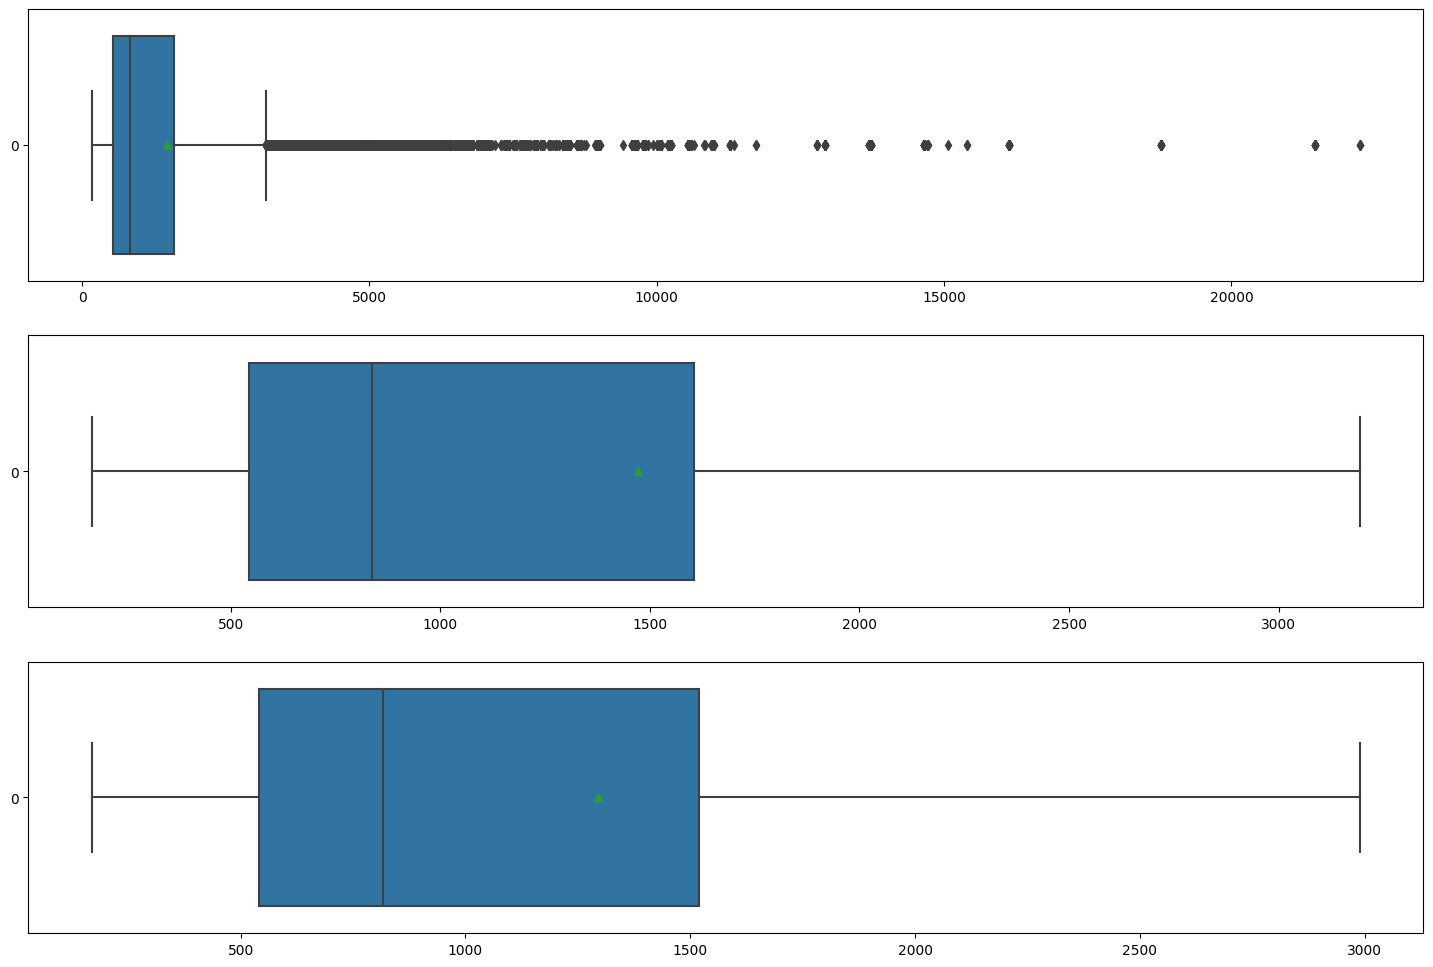

In [185]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def detect_outlier(extracted):
    # Calculate the length of each element in the extracted list
    len_extracted = np.array([len(e) for e in extracted])

    # Calculate quartiles and the upper fence using numpy
    Q1 = np.percentile(len_extracted, 25)
    Q3 = np.percentile(len_extracted, 75)
    IQR = Q3 - Q1
    Upper_Fence = Q3 + (3 * IQR)

    print("Upper   :", Upper_Fence)
    print("Before  :", len(len_extracted))
    print("After   :", len(len_extracted[len_extracted <= Upper_Fence]))
    print("Percent :", len(len_extracted[len_extracted <= Upper_Fence]) / len(len_extracted) * 100, "%")

    # Calculate upper limit using mean and standard deviation
    mean = len_extracted.mean()
    std = len_extracted.std()
    upper_limit = mean + 3 * std

    print("\nBy Std")
    print(f"Upper limit: {upper_limit}")
    print("Before  :", len(len_extracted))
    print("After   :", len(len_extracted[len_extracted <= upper_limit]))
    print("Percent :", len(len_extracted[len_extracted <= upper_limit]) / len(len_extracted) * 100, "%")

    # Set up a figure and axes
    fig, ax = plt.subplots(3, 1, figsize=(18, 12))

    # Create the box plot
    sns.boxplot(
        data=len_extracted,
        orient="h",
        showmeans=True, 
        ax=ax[0]
    )

    # Create the box plot without outliers
    sns.boxplot(
        data=len_extracted,
        orient="h",
        showmeans=True, 
        showfliers=False,
        ax=ax[1]
    )

    # Create the box plot without outliers and with upper limit
    sns.boxplot(
        data=len_extracted[len_extracted <= upper_limit],
        orient="h",
        showmeans=True, 
        showfliers=False,
        ax=ax[2]
    )

    plt.show()

# Example usage:
detect_outlier(extracted)
